## Maximum Temperature, Depth at Maximum Temperature, Salinity for PFL Instruments in the Polynya Region

This notebook computes and saves the Maximum Temperature, Depth at Maximum Temperature, and Salinity of each time value in a csv file. It then plots the time series for each attribute.

In [3]:
# import libraries
from datetime import datetime, timedelta
import numpy as np
import xarray
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from pandas import Series, DataFrame
import gsw
import cmocean
import sys
import glob
import errno
import os
import os.path
import netCDF4 as nc
import geopandas as gpd
import string
import time
import csv

In [4]:
datadir = '/path/datafolder/'
# Insert folder path
for filename in os.listdir(datadir):
        
    #savedir = '/path/savefolder/'
    # Insert directory you'd like to save in
        
    #def filecount(dir_name):
    #   """This function counts number of files in directory provided"""
    #   return len([f for f in os.listdir(dir_name) if os.path.isfile(f)])
        
    fname = filename
        
    ncdata = xarray.open_dataset(datadir + fname)
    juld = pd.to_datetime(ncdata.time.values) # convert time values to datetime
    #print(juld)
    lats = np.array(ncdata.lat.values) # latitude
    lons = np.array(ncdata.lon.values) # longitude
    temp = ncdata.Temperature.values # in situ temperature
    press = ncdata.Pressure.values  # pressure (needed for depth)
    salt = ncdata.Salinity.values  # in situ practical salinity
    SA = gsw.conversions.SA_from_SP(salt, press,
                                        lons, lats)  # absolute salinity
    z = gsw.conversions.z_from_p(press, lats) # depth calculated from pressure
    
    maxtemp = temp.max() # Maximum Temperature
    a = temp.argmax() #index of the max temp
    depth = z[a] # Depth at Maximum Temperature
    maxdepth = z.max() # Maximum Depth
    PSatMaxTemp = salt[a] # Practical Salinity at Maximum Temperature
    ASatMaxTemp = SA[a] # Absolute Salinity at Maximum  Temperature
    PS = np.mean(salt) # Mean Practical Salinity
    AS = np.mean(SA)  # Mean Absolute Salinity 
        
    if maxtemp > 10 or depth < -700 or PSatMaxTemp<0 or ASatMaxTemp<0:
        # Skips maximum temperatures above 10 and depths deeper than 700 (considered anomalous)
        # Skips negative salinities (considered anomalous)
        continue
        
    maxT = ([maxtemp]) # Maximum Temperature list 
    maxZ = ([maxdepth]) # Maximum Depth list
    ZmaxT = ([depth]) # Depth at Maximum Temperature list
    salmaxT = ([PSatMaxTemp]) # Practical Salinity at Maximum Temperature list
    abs_salmaxT = ([ASatMaxTemp]) # Absolute Salinity at Maximum Temperature list
    
    data = {'MaxTemp': maxT, 'MaxDepth': ZmaxT, 'Practical Salinity at Max Temp': salmaxT,
            'Absolute Salinity at Max Temp': abs_salmaxT}
    df = DataFrame(data, index=[juld])
    #df['Juld'] = DataFrame(store)
    #df['MaxTemp'] = DataFrame(maxT)
        
    with open("path\csvfile", "a")  as f: 
        # Insert path for the file you'll save the dataframe in
        table1 = df.to_csv(f, sep=',', header=False)
            

In [5]:
ncdata

<xarray.Dataset>
Dimensions:                        (z: 497)
Coordinates:
    lat                            float32 -64.559
    lon                            float32 6.741
    time                           datetime64[ns] 2017-12-28T18:39:21.959266304
  * z                              (z) float32 4.733237 6.4165792 8.495982 ...
Data variables:
    country                        |S200 ...
    WOD_cruise_identifier          |S200 ...
    originators_cruise_identifier  |S200 ...
    wod_unique_cast                int32 ...
    date                           int32 ...
    GMT_time                       float32 ...
    Access_no                      int32 ...
    Project                        |S200 ...
    Orig_Stat_Num                  int32 ...
    Cast_Direction                 |S200 ...
    dataset                        |S200 ...
    real_time                      |S200 ...
    Ocean_Vehicle                  |S200 ...
    dbase_orig                     |S200 ...
    WMO_ID         

In [6]:
df.head() # Check dataframe headers

,Absolute Salinity at Max Temp,MaxDepth,MaxTemp,Practical Salinity at Max Temp
2017-12-28 18:39:21.959266304,34.849616,-374.537929,0.456,34.678001


In [1]:
#result = pd.read_csv('path\csvfile', header=None, error_bad_lines=False, delimiter=',')
# Insert file path you stored the attributes in
#result.columns = ['YearTime', 'Absolute Salinity at Max Temp', 'MaxDepth', 'MaxTemp', 'Practical Salinity at Max Temp']
# Setup the column headers
#result

In [11]:
def try_parsing_date(text):
    """ This function takes in date written as a string 
    in two different formats and returns it as datetime"""
    for fmt in ('%Y-%m-%d', '%Y-%m-%d %H:%M:%S'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

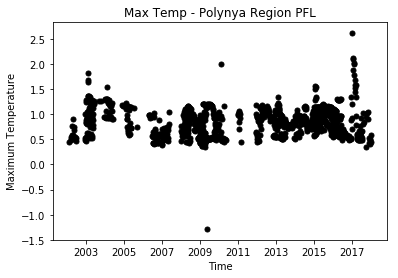

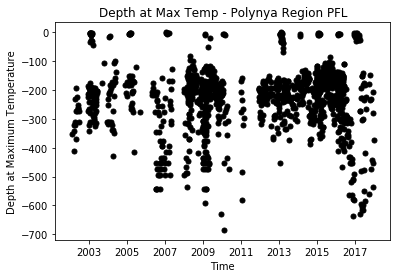

In [15]:
# Plot all Maximum Temperatures in a time series
x=[]
y=[]

with open('path\csvfile','r') as csvfile: 
    # Insert path of the csv file you'll plot
    plots = csv.reader(csvfile, delimiter=',')
    for column in plots:
        yeartime = column[0].split(".")[0] # Ignores fraction seconds
        x.append(try_parsing_date(yeartime))
        y.append(float(column[3])) # MaxTemp column

plt.scatter(x,y, label='Loaded from file!', color='k', s=25, marker="o")
plt.xlabel('Time')
plt.ylabel('Maximum Temperature')
#plt.yscale('symlog', linthreshx=0.1)
plt.title('Max Temp - Polynya Region PFL')
plt.show()

# Plot all Depths at Maximum Temperature in a time series
x=[]
y=[]

with open('path\csvfile','r') as csvf:
    # Insert path of the csv file you'll plot
    plot1 = csv.reader(csvf, delimiter=',')
    for column in plot1:
        yeartime = column[0].split(".")[0] # Ignores fraction seconds
        x.append(try_parsing_date(yeartime))
        y.append(float(column[2])) # MaxDepth column

plt.scatter(x,y, label='Loaded from file!', color='k', s=25, marker="o")
plt.xlabel('Time')
plt.ylabel('Depth at Maximum Temperature')
plt.title('Depth at Max Temp - Polynya Region PFL')
plt.show()

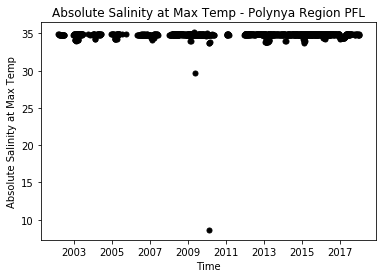

In [16]:
# Plot all Absolute Salinities at Maximum Temperature in a time series
x=[]
y=[]

with open('path\csvfile','r') as cfile:
    # Insert path of the csv file you'll plot
    pl = csv.reader(cfile, delimiter=',')
    for column in pl:
        yeartime = column[0].split(".")[0] # Ignores fraction seconds
        x.append(try_parsing_date(yeartime))
        y.append(float(column[1])) # Absolute Salinity at Max Temp column

plt.scatter(x,y, label='Loaded from file!', color='k', s=25, marker="o")
plt.xlabel('Time')
plt.ylabel('Absolute Salinity at Max Temp')
#plt.yscale('symlog', linthreshx=0.1)
plt.title('Absolute Salinity at Max Temp - Polynya Region PFL')
plt.show()

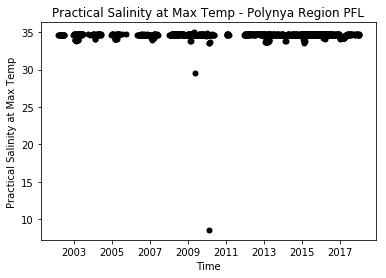

In [17]:
# Plot all Practical Salinities at Maximum Temperature in a time series
x=[]
y=[]

with open('path\csvfile','r') as cfile1:
    # Insert path of the csv file you'll plot
    pl1 = csv.reader(cfile1, delimiter=',')
    for column in pl1:
        yeartime = column[0].split(".")[0] # Ignores fraction seconds
        x.append(try_parsing_date(yeartime))
        y.append(float(column[4])) # Practical Salinity at Max Temp column

plt.scatter(x,y, label='Loaded from file!', color='k', s=25, marker="o")
plt.xlabel('Time')
plt.ylabel('Practical Salinity at Max Temp')
#plt.yscale('symlog', linthreshx=0.1)
plt.title('Practical Salinity at Max Temp - Polynya Region PFL')
plt.show()